In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_zec_co2=pd.read_csv('ZECMIP_data/strict_collated_co2_timeseries_data.csv',index_col=0, sep=';', decimal=".")
df_zec_fgco2=pd.read_csv('ZECMIP_data/strict_collated_fgco2_timeseries_data_corrected.csv',index_col=0, sep=';', decimal=".")
df_zec_tas=pd.read_csv('ZECMIP_data/strict_collated_tas_timeseries_data.csv',index_col=0, sep=';', decimal=".")
df_zec_nbp=pd.read_csv('ZECMIP_data/strict_collated_nbp_timeseries_data.csv',index_col=0)


<Axes: xlabel='Year'>

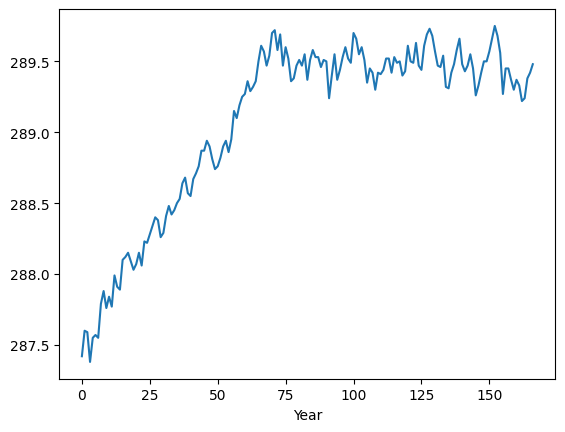

In [3]:
df_zec_tas['ACCESS'].plot()

In [4]:
df_zec_tas=df_zec_tas-2*df_zec_tas.iloc[:20].mean()+df_zec_tas.iloc[10:30].mean()

In [5]:
#df_zec_tas['ACCESS']=np.nan

<Axes: xlabel='Year'>

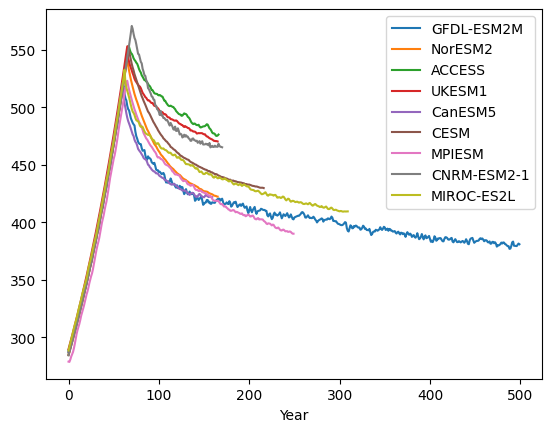

In [6]:
df_zec_co2.plot()

<Axes: xlabel='Year'>

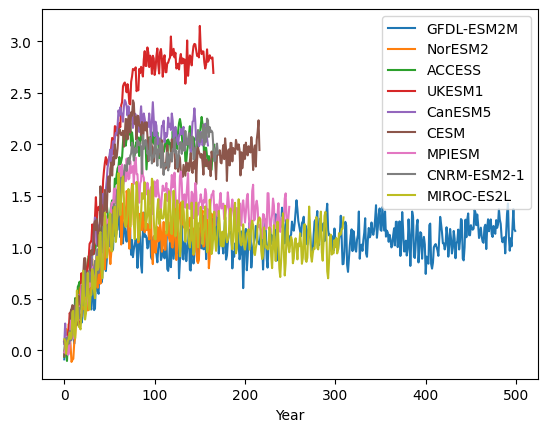

In [7]:
df_zec_tas.plot()

<Axes: xlabel='Year'>

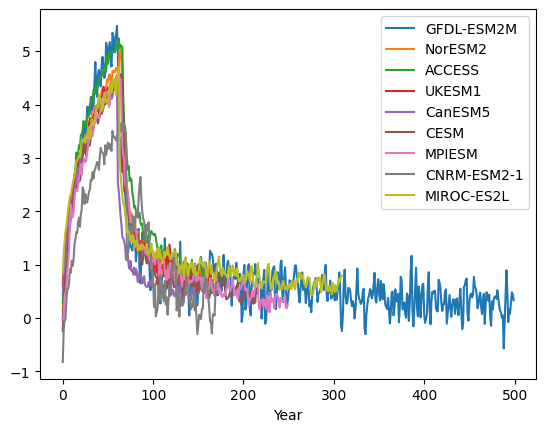

In [8]:
df_zec_fgco2.plot()

<Axes: xlabel='Year'>

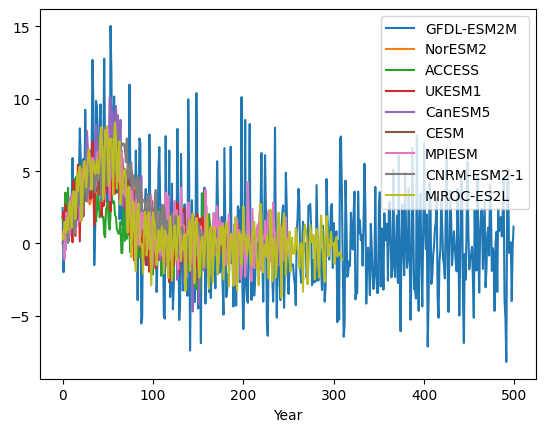

In [9]:
df_zec_nbp.plot()


In [10]:
c_emis_zec=(((df_zec_co2-df_zec_co2.iloc[0]).diff()*2.13)+df_zec_fgco2+df_zec_nbp)

In [11]:
#c_emis_zec['ACCESS'][:]=np.nan

In [12]:
cezec=c_emis_zec/c_emis_zec.cumsum().iloc[100]*1000

In [13]:
yr1000=(cezec.cumsum()>999).idxmax()

In [14]:
cezec

,GFDL-ESM2M,NorESM2,ACCESS,UKESM1,CanESM5,CESM,MPIESM,CNRM-ESM2-1,MIROC-ES2L
Year,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,4.496565,6.101207,8.277439,9.412478,7.380406,6.308785,0.319054,5.703931,8.820371
2.0,7.074318,6.979604,8.381772,8.334434,7.953887,7.036271,3.725298,6.914843,9.594582
3.0,5.981089,8.231707,10.804422,10.302576,8.719941,8.393589,6.101173,6.827384,9.001680
4.0,7.634084,7.872095,10.036436,10.027012,9.819774,8.451348,6.742047,7.335234,9.547286
...,...,...,...,...,...,...,...,...,...
495.0,-0.178434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496.0,-0.025647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497.0,-1.038220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


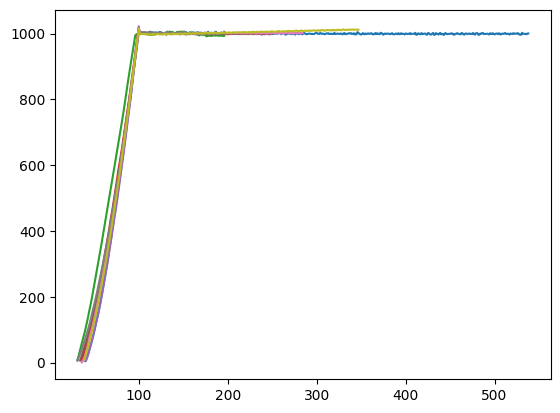

In [15]:
for m in cezec.columns:
    plt.plot(cezec.index-yr1000[m]+100,cezec[m].cumsum())


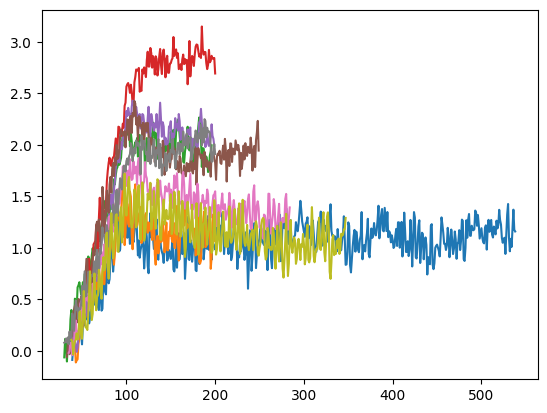

In [16]:
for m in cezec.columns:
    plt.plot(df_zec_tas.index-yr1000[m]+100,df_zec_tas[m])


In [17]:
mdlmap={}
mdlmap['CESM2']='CESM'
mdlmap['CNRM-ESM2-1']='CNRM-ESM2-1'
mdlmap['MPI-ESM1-2-LR']='MPIESM'
mdlmap['NorESM2-LM']='NorESM2'
mdlmap['UKESM']='UKESM1'
mdlmap['ACCESS-ESM1-5']='ACCESS'
usmdls=list(mdlmap.keys())

inv_map = {v: k for k, v in mdlmap.items()}

In [18]:
df_zec_tas.rename(columns=inv_map).filter(usmdls).to_csv('zecmip_tas.csv')
cezec.rename(columns=inv_map).filter(usmdls).to_csv('zecmip_emis.csv')